In [59]:
# Data Overview
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load clean data 
df_clean = pd.read_csv("Telco-Customer-Churn-Clean.csv")

# Quick look
print(df_clean.info())
print(df_clean.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 6560 entries, SeniorCitizen to TotalCharges_999.9
dtypes: bool(6556), float64(4)
memory usage: 44.2 MB
None
   SeniorCitizen    tenure  MonthlyCharges     Churn  gender_Male  \
0      -0.439916 -1.277445       -1.160323 -0.601023        False   
1      -0.439916  0.066327       -0.259629 -0.601023         True   
2      -0.439916 -1.236724       -0.362660  1.663829         True   
3      -0.439916  0.514251       -0.746535 -0.601023         True   
4      -0.439916 -1.236724        0.197365  1.663829        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                   

C:\Users\sreeh\AppData\Local\Temp\ipykernel_14260\3812495376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_clean, palette='viridis')


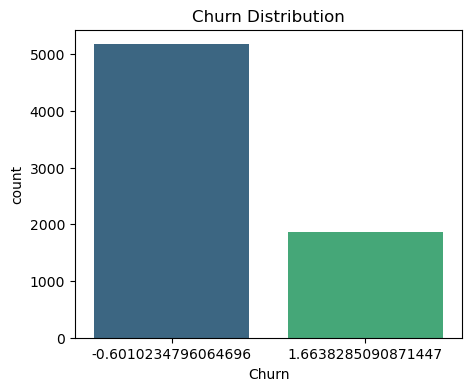

Churn %:
Churn
-0.601023    73.463013
 1.663829    26.536987
Name: proportion, dtype: float64


In [60]:
#Target Variable Distribution (Churn)
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df_clean, palette='viridis')
plt.title("Churn Distribution")
plt.show()

# Percentage churn
print("Churn %:")
print(df_clean['Churn'].value_counts(normalize=True)*100)

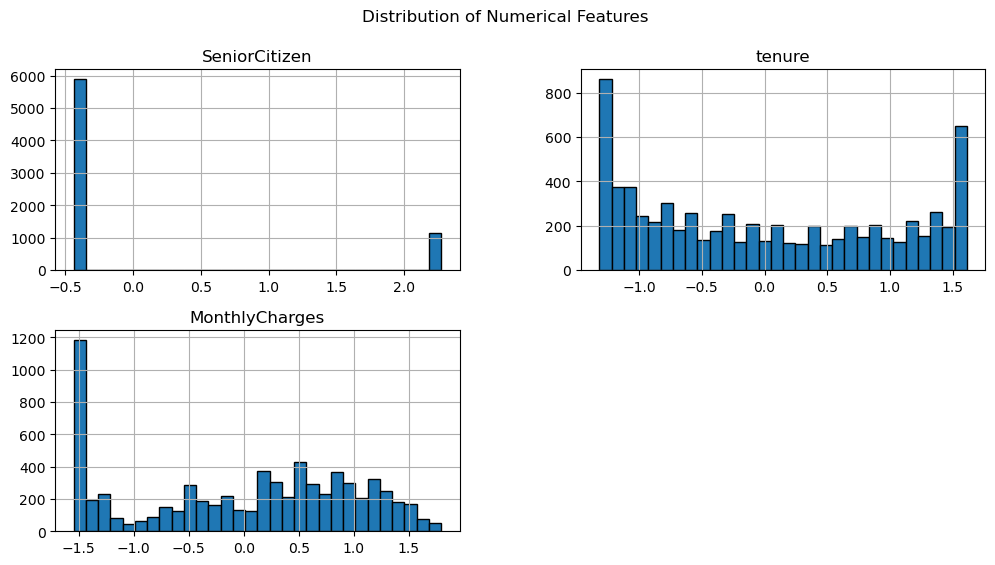

In [61]:
#Distribution of numerical features

num_cols = df_clean.select_dtypes(include=['int64','float64']).columns.drop('Churn')

df_clean[num_cols].hist(bins=30, figsize=(12,6), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

C:\Users\sreeh\AppData\Local\Temp\ipykernel_14260\857404949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='coolwarm')


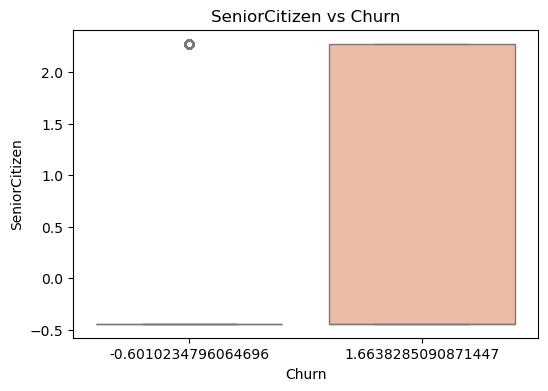

C:\Users\sreeh\AppData\Local\Temp\ipykernel_14260\857404949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='coolwarm')


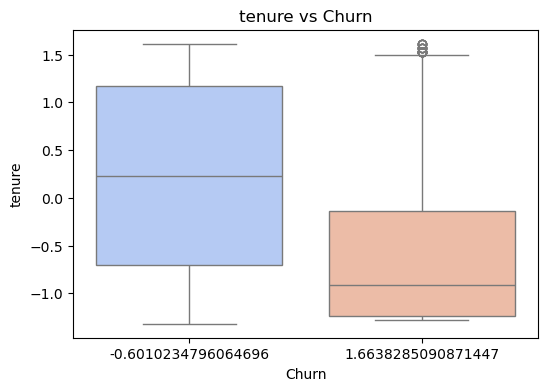

C:\Users\sreeh\AppData\Local\Temp\ipykernel_14260\857404949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clean, palette='coolwarm')


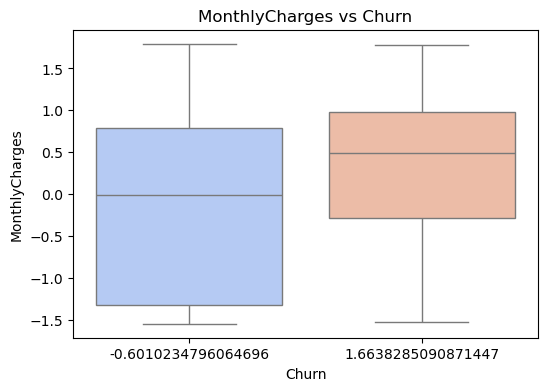

In [62]:
#Churn versus numerical features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df_clean, palette='coolwarm')
    plt.title(f"{col} vs Churn")
    plt.show()

In [63]:
#Churn versus categorial features
cat_cols = df_clean.select_dtypes(include=['uint8','object']).columns
if 'customerID' in cat_cols:
    cat_cols = cat_cols.drop('customerID')  # if still present

for col in cat_cols:
    if df_clean[col].nunique() <= 10:  # skip wide one-hot columns
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='Churn', data=df_clean, palette='coolwarm')
        plt.title(f"Churn by {col}")
        plt.xticks(rotation=45)
        plt.show()


In [64]:
#Summary insights
summary = df_clean.groupby('Churn')[['tenure','MonthlyCharges']].mean()
print(summary)

             tenure  MonthlyCharges
Churn                              
-0.601023  0.211698       -0.116212
 1.663829 -0.586048        0.321712
